In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import time 
import os
import math
from ParseJsons import check_box
from multiprocessing import Process
from geopandas.geoseries import Point
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.dpi'] = 100
% matplotlib inline


lsoa_shp_df    = gpd.read_file('area_matching/lsoa_shp/lsoa.shp')
msoa_shp_df    = gpd.read_file('statistical-gis-boundaries-london/ESRI/MSOA_2004_London_High_Resolution.shp').to_crs({'init': 'epsg:4326'})  
ward_shp_df    = gpd.read_file('wards/London-wards-2014_ESRI/London_Ward.shp').to_crs({'init': 'epsg:4326'})  
borough_shp_df = gpd.read_file('statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp').to_crs({'init': 'epsg:4326'})  


In [3]:
city        = 'london'
outfolder   = '../ProcessedData/' + city + '/'


def get_distr_venues(outfolder, resolution):

    filename        = outfolder + 'venues_info/venues_' + resolution + '_full.dat'
    ward_venues     = {}
    relevant_venues = set()
    
    for ind, line in enumerate(open(filename)):
        
        if 'ward' not in line:

            venue, lng, lat, ward, lng0, lat0, lng1, lat1, length, area = line.strip().split('\t')

            if ward not in ward_venues:
                ward_venues[ward] = [venue]
            else:
                ward_venues[ward].append(venue)

            relevant_venues.add(venue)

        #if ind == 10: break
        
      
    return ward_venues, relevant_venues
    
    
   
ward_venues, relevant_venues = get_distr_venues(outfolder, 'ward')

ward_dens = {}
for w, v in ward_venues.items():
    ward_dens[w] = {}
    ward_dens[w]['GSS_CODE'] = w
    ward_dens[w]['dens']     = math.log(len(v))
 
dfward = pd.DataFrame.from_dict(ward_dens, orient='index', columns = ['GSS_CODE', 'dens'])
newward = ward_shp_df.merge(dfward,  on='GSS_CODE', how='left').fillna(0)
 

/home/milan/.local/lib/python2.7/site-packages/geopandas/plotting.py:381: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


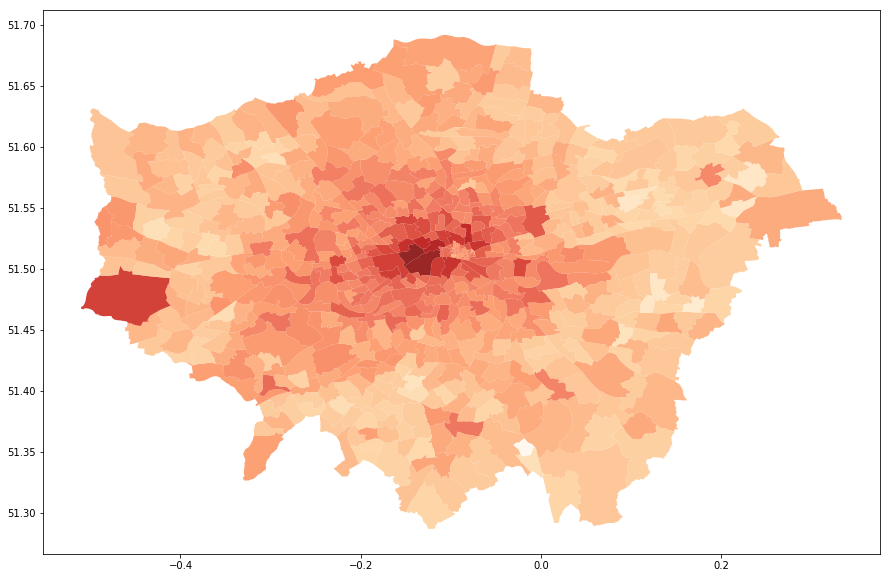

In [4]:
#borough_shp_df.plot()
f, ax = plt.subplots(1, 1, figsize=(15, 10)) 
newward.plot(legend=False, axes=ax, alpha=0.85, column='dens', cmap='OrRd')
#msoa_shp_df.plot()
#lsoa_shp_df.plot()
plt.savefig('../../Pres/londonmap.png')
